In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load your data
df = pd.read_csv('Output/Combined_Wordlist.csv')


C:\Users\mathi\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#df["Combined_JLPT_Ratings"]
df[df["Duolingo_Words"]==1].tail(50)

,Rank,Word,Occurrences,Duolingo_Words,JLPT_Words,JLPT_Level
10670,NaN,あさごはん,NaN,1,0,NaN
10671,NaN,たべ,NaN,1,0,NaN
10672,NaN,ジュース,NaN,1,0,NaN
10673,NaN,まいにち,NaN,1,0,NaN
10674,NaN,サンドイッチ,NaN,1,0,NaN
10675,NaN,J,NaN,1,0,NaN
10676,NaN,やきゅう,NaN,1,0,NaN
10677,NaN,ざっし,NaN,1,0,NaN
10678,NaN,おんがく,NaN,1,0,NaN
10679,NaN,ときどき,NaN,1,0,NaN


In [4]:
# Identify JLPT words not in Duolingo
gap_words = df[(df['JLPT_Words'] == 1) & (df['Duolingo_Words'] == 0)]
print(f"Number of JLPT words not covered by Duolingo: {len(gap_words)}")
print(gap_words.head())


Number of JLPT words not covered by Duolingo: 6250
    Rank Word  Occurrences  Duolingo_Words  JLPT_Words JLPT_Level
19  20.0   利用   10474017.0               0           1         N4
28  29.0    第    5552379.0               0           1         N1
33  34.0   です    4603205.0               0           1         N5
35  36.0   会話    4511440.0               0           1         N4
51  52.0   依頼    3077750.0               0           1         N3


Defaulting to user installation because normal site-packages is not writeable


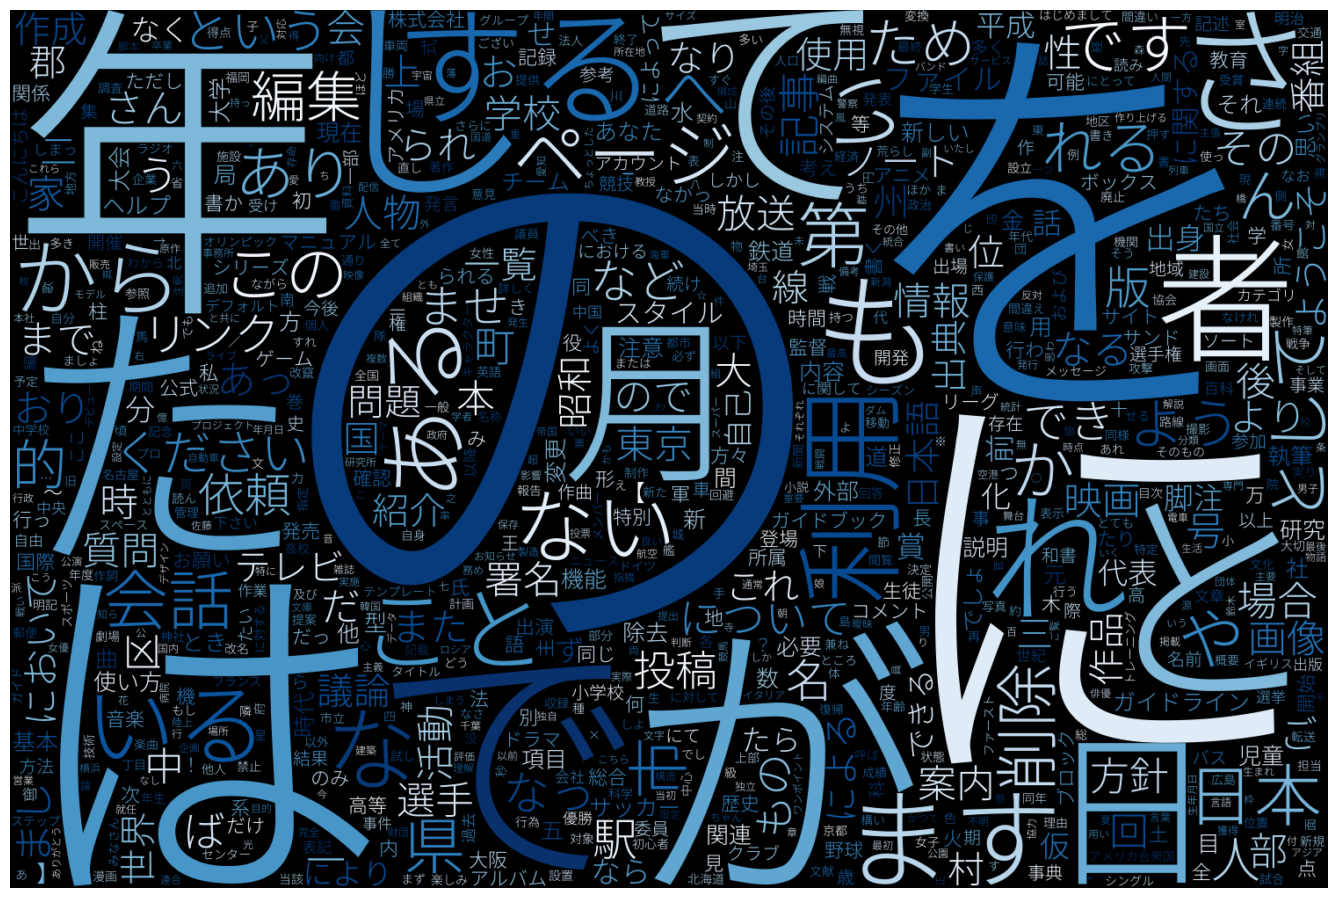

In [20]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def make_word_cloud(words_freq_dict):
  # setup Japanese font for creating the word cloud
  font_path = 'NotoSansJP-Light.ttf'
  # create an image with a Word Cloud with the given word frequencies
  wordcloud = WordCloud(width=1500,
                        height=1000,
                        max_words=900,
                        colormap='Blues',
                        font_path=font_path,
                        normalize_plurals=True).generate_from_frequencies(words_freq_dict)
  # setup a plot frame without any axis and print the image generated above  
  plt.figure(figsize=(17,14))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

# Convert df_sorted into the required dictionary format
freq_dict = dict(zip(df_sorted['Word'], df_sorted['Occurrences']))

# Now pass it to your function
make_word_cloud(freq_dict)

#make_word_cloud(df_sorted)

C:\Users\mathi\AppData\Local\Temp\ipykernel_48484\2613962896.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(df_sorted, values='JLPT_Words', index='Rank_Bin', columns='JLPT_Level', aggfunc='sum', fill_value=0)


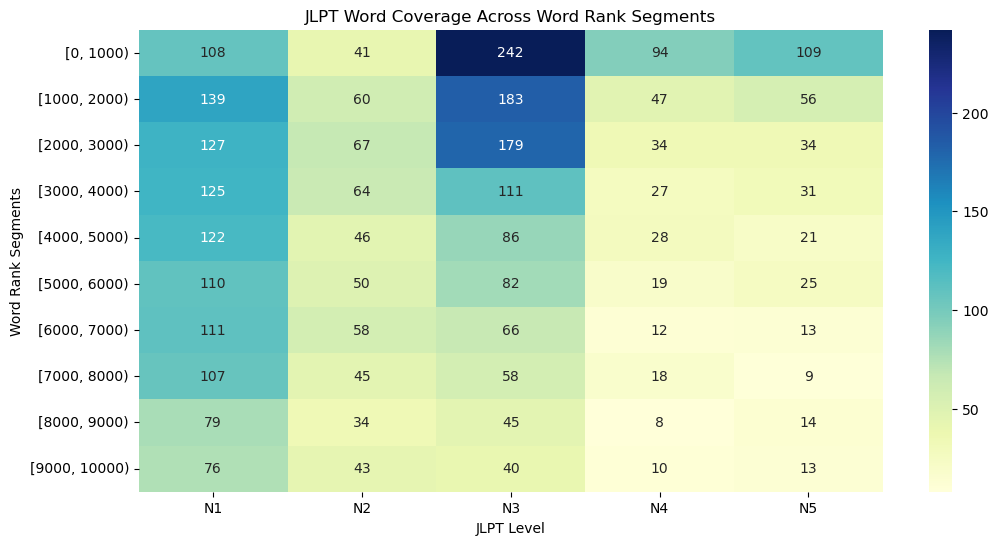

In [26]:
import seaborn as sns

# Create bins for Word Rank (e.g., 0-1000, 1000-2000, etc.)
df_sorted['Rank_Bin'] = pd.cut(df_sorted['Rank'], bins=range(0, 11000, 1000), right=False)

# Pivot table for JLPT Coverage
heatmap_data = pd.pivot_table(df_sorted, values='JLPT_Words', index='Rank_Bin', columns='JLPT_Level', aggfunc='sum', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title("JLPT Word Coverage Across Word Rank Segments")
plt.xlabel("JLPT Level")
plt.ylabel("Word Rank Segments")
plt.show()


In [31]:
import requests

# Function to fetch English definitions and JLPT level
def fetch_word_info(word):
    url = f"https://jisho.org/api/v1/search/words?keyword={word}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        
        # Extract the English definitions from the first "senses" block and JLPT info
        for entry in data.get("data", []):
            if entry.get("senses"):
                # Extract English definitions from the first "senses" block
                definitions = entry["senses"][0].get("english_definitions", [])
                
                # Extract JLPT level
                jlpt_levels = entry.get("jlpt", [])
                
                return definitions, jlpt_levels
        
    return [], []  # Return empty lists if no data is found

# Example usage: Fetch word information (definitions and JLPT level) for a list of words
words = ['食べる', '見る', '行く']  # Example words
word_info = {}

for word in words:
    definitions, jlpt_levels = fetch_word_info(word)
    word_info[word] = {'definitions': definitions, 'jlpt_levels': jlpt_levels}

# Display the extracted information
print(word_info)


{'食べる': {'definitions': ['to eat'], 'jlpt_levels': ['jlpt-n5']}, '見る': {'definitions': ['to see', 'to look', 'to watch', 'to view', 'to observe'], 'jlpt_levels': ['jlpt-n5']}, '行く': {'definitions': ['to go', 'to move (towards)', 'to head (towards)', 'to leave (for)'], 'jlpt_levels': ['jlpt-n1', 'jlpt-n5']}}


In [32]:
import requests
import pandas as pd

# Function to fetch English definitions and JLPT level
def fetch_word_info(word):
    url = f"https://jisho.org/api/v1/search/words?keyword={word}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        
        # Extract the English definitions from the first "senses" block and JLPT info
        for entry in data.get("data", []):
            if entry.get("senses"):
                # Extract English definitions from the first "senses" block
                definitions = entry["senses"][0].get("english_definitions", [])
                
                # Extract JLPT level
                jlpt_levels = entry.get("jlpt", [])
                
                return definitions, jlpt_levels
        
    return [], []  # Return empty lists if no data is found

# Your entire word list (for example, words from JLPT, Duolingo, or Top 10k lists)
word_list = ['食べる', '見る', '行く', '話す', '走る']  # Replace this with your full list

# Initialize a list to store the data
data = []

# Loop through the list of words and fetch information for each
for word in word_list:
    definitions, jlpt_levels = fetch_word_info(word)
    data.append({'word': word, 'definitions': definitions, 'jlpt_levels': jlpt_levels})

# Convert the data into a pandas DataFrame for better organization and analysis
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


  word                                        definitions         jlpt_levels
0  食べる                                           [to eat]           [jlpt-n5]
1   見る   [to see, to look, to watch, to view, to observe]           [jlpt-n5]
2   行く  [to go, to move (towards), to head (towards), ...  [jlpt-n1, jlpt-n5]
3   話す          [to talk, to speak, to converse, to chat]           [jlpt-n5]
4   走る                                           [to run]           [jlpt-n5]


In [33]:
fullList = pd.read_csv('Output/Combined_Wordlist.csv')
print(fullList.head(11))

    Rank Word  Occurrences  Duolingo_Words  JLPT_Words JLPT_Level
0    1.0    の  100210912.0               1           1         N5
1    2.0    に   48486620.0               1           1         N5
2    3.0    を   45359475.0               1           1         N5
3    4.0    は   44889871.0               1           1         N5
4    5.0    年   36248501.0               1           1         N5
5    6.0    が   35947527.0               1           1         N5
6    7.0    た   33512205.0               1           0        NaN
7    8.0    で   31990565.0               1           1         N5
8    9.0    て   30603437.0               1           0        NaN
9   10.0    と   27106309.0               1           1         N5
10  11.0    し   25876681.0               1           0        NaN


In [34]:
import pandas as pd
import requests
import time

 Function to fetch English definitions and JLPT level
def fetch_word_info(word):
    url = f"https://jisho.org/api/v1/search/words?keyword={word}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        
        # Extract the English definitions from the first "senses" block and JLPT info
        for entry in data.get("data", []):
            if entry.get("senses"):
                # Extract English definitions from the first "senses" block
                definitions = entry["senses"][0].get("english_definitions", [])
                
                # Extract JLPT level
                jlpt_levels = entry.get("jlpt", [])
                
                return definitions, jlpt_levels
        
    return [], []  # Return empty lists if no data is found

# Function to track progress
def extract_word_info(row, progress_counter, total_words):
    definitions, jlpt_levels = fetch_word_info(row['Word'])
#    
    # Update the progress and print every 20 seconds
    progress_counter[0] += 1
    if progress_counter[0] % 100 == 0 or time.time() - progress_counter[1] > 20:
        progress_counter[1] = time.time()  # Reset the timer
        print(f"{progress_counter[0]} / {total_words} Done")

    return pd.Series([definitions, jlpt_levels], index=['Definitions', 'JLPT_Levels'])

# fullList is DataFrame
 Total number of words to process
total_words = len(fullList)

# Initialize the progress tracker
progress_counter = [0, time.time()]  # [processed_count, start_time]

# Apply the function across the rows of the fullList DataFrame
fullList[['Definitions', 'JLPT_Levels']] = fullList.apply(lambda row: extract_word_info(row, progress_counter, total_words), axis=1)

# Display the DataFrame with the new columns
print(fullList.head())  # or fullList to see the entire dataset


In [35]:
# Save the Scraped dataframe to a CSV
fullList.to_csv("Output/Scraped_Wordlist.csv", index=False, encoding="utf-8-sig")

In [36]:
Scraped = pd.read_csv("Output/Scraped_Wordlist.csv", encoding = "utf-8")
print(Scraped[["Word", "Definitions"]].head(50))

    Word                                        Definitions
0      の                           ['indicates possessive']
1      に                                       ['two', '2']
2      を              ['indicates direct object of action']
3      は                       ['indicates sentence topic']
4      年                                           ['year']
5      が            ['indicates the subject of a sentence']
6      た                                     ['rice field']
7      で  ['coming out', 'going out', 'outflow', 'efflux...
8      て                                    ['hand', 'arm']
9      と                     ['door (esp. Japanese-style)']
10     し                        ['poem', 'poetry', 'verse']
11     月                                           ['Moon']
12     日                                         ['Sunday']
13     れ                        ['check mark', 'tick mark']
14     さ                        ['difference', 'variation']
15     者                                